In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
#Reading the data set
data = pd.read_csv('Churn_Modelling.csv')

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
#creating independent and depedent variables
X = data.iloc[:,3:13]
y = data.iloc[:, 13]


In [30]:
#creating dummy variables for categorical features
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [31]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)



In [32]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [36]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

C:\Users\bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7197 - loss: 0.5742 - val_accuracy: 0.7955 - val_loss: 0.5163
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7938 - loss: 0.5080 - val_accuracy: 0.7955 - val_loss: 0.4905
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7918 - loss: 0.4950 - val_accuracy: 0.7955 - val_loss: 0.4786
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7989 - loss: 0.4774 - val_accuracy: 0.7955 - val_loss: 0.4697
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7975 - loss: 0.4625 - val_accuracy: 0.7955 - val_loss: 0.4626
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7936 - loss: 0.4685 - val_accuracy: 0.7955 - val_loss: 0.4572
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8016 - loss: 0.4500 - val_accuracy: 0.7955 - val_loss: 0.4524
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7918 - loss: 0.4585 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


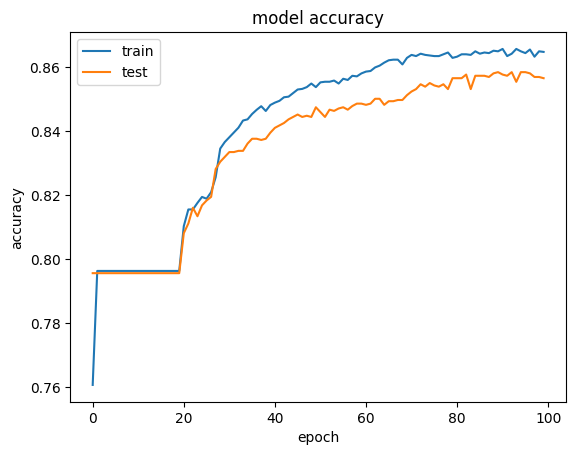

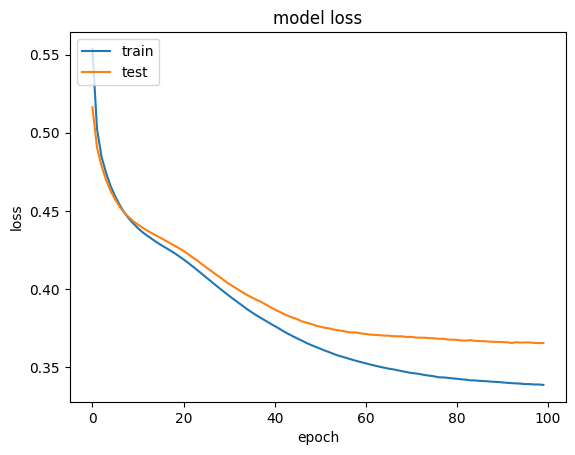

In [40]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [43]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


In [45]:
score

0.853